# Importing the necessary libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Create the dataframe

In [72]:
Keys = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', \
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '>50K, <=50K']
adult = pd.read_csv("./adult.data", sep="\s*,\s*", engine = 'python', names=Keys, index_col=False)
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# 1. How many males and females are there?

In [73]:
adult.sex.value_counts()
#adult.dtypes

Male      21790
Female    10771
Name: sex, dtype: int64

# 2. What is the mean male age?

In [157]:
print("Mean Male age is: ", adult[adult.sex.apply(lambda x: "Male" in x)].age.mean())


#быстрая проверка
print("\n", adult.groupby('sex').age.mean())

Mean Male age is:  39.43354749885268

 sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


# 3. What is the proportion of the US citizens?

In [75]:
adult[adult["native-country"] == "United-States"].shape[0] / adult.shape[0]

0.895857006848684

# 4. Plot the distribution of people’s education as a bar plot.

In [76]:
adult.education.value_counts().values

array([10501,  7291,  5355,  1723,  1382,  1175,  1067,   933,   646,
         576,   514,   433,   413,   333,   168,    51])

In [77]:
adult.education.value_counts().index

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th',
       'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
      dtype='object')

<BarContainer object of 16 artists>

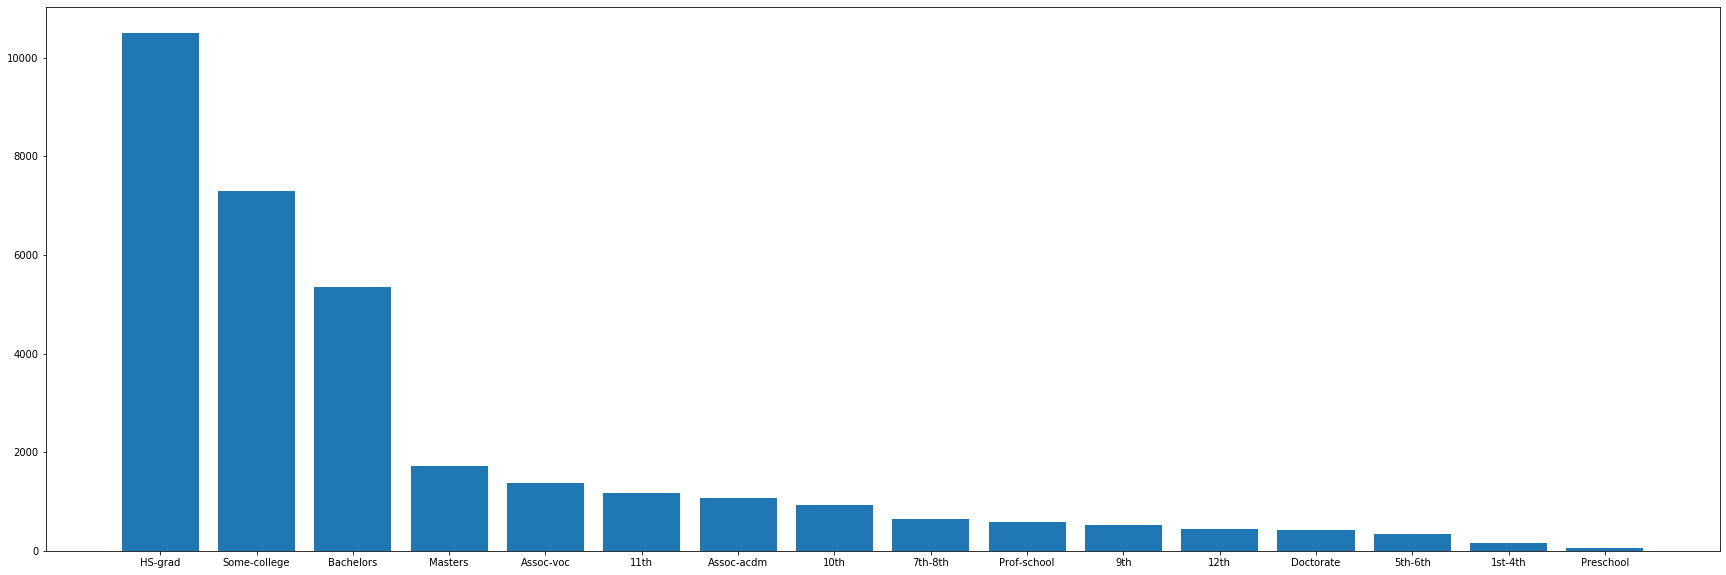

In [78]:
#Если под распределнием имеется в виду общее кол-во людей из бд с определенным образованием, то

plt.figure(figsize=(30,10))
plt.bar(adult.education.value_counts().index, adult.education.value_counts().values)

# 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [79]:
print(adult[adult['marital-status'] == 'Divorced'].fnlwgt.mean())
print("\n")
print(adult[adult['marital-status'] == 'Divorced'].fnlwgt.std())

185802.79045689848


105646.78945933603


# 6. Is it true that the people who receive over 50k are mostly highly educated?

In [183]:

adult.loc[adult['>50K, <=50K'] == '>50K'].groupby('education').education.count()

education
10th              62
11th              60
12th              33
1st-4th            6
5th-6th           16
7th-8th           40
9th               27
Assoc-acdm       265
Assoc-voc        361
Bachelors       2221
Doctorate        306
HS-grad         1675
Masters          959
Prof-school      423
Some-college    1387
Name: education, dtype: int64

In [184]:
#Num - кол-во всех с зарплатой больше 50К
Num = adult.loc[adult['>50K, <=50K'] == '>50K'].shape[0]
print(Num)

high_educated = 265 + 361 + 2221 + 306 + 959
print("Соотношение по образованию", high_educated / Num)
print(high_educated / Num > 0.5)

7841
Соотношение по образованию 0.5244229052416783
True


# 7. What is the maximum male and female age for each race?

In [86]:
adult.groupby(['race','sex']).age.max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

# 8. The people from which countries work as farmers/fishers?

In [107]:
adult[adult.occupation == "Farming-fishing"].groupby("native-country")['native-country'].count().index

Index(['?', 'Cambodia', 'Canada', 'Cuba', 'El-Salvador', 'England', 'France',
       'Germany', 'Guatemala', 'Hong', 'Ireland', 'Italy', 'Japan', 'Mexico',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'United-States',
       'Vietnam', 'Yugoslavia'],
      dtype='object', name='native-country')

# 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [144]:
Male_B = adult.loc[adult['education'] == 'Bachelors'].loc[adult['sex'] == 'Male'].shape[0]

Female_B = adult.loc[adult['education'] == 'Bachelors'].loc[adult['sex'] == 'Female'].shape[0]

Male_M = adult.loc[adult['education'] == 'Masters'].loc[adult['sex'] == 'Male'].shape[0]

Female_M = adult.loc[adult['education'] == 'Masters'].loc[adult['sex'] == 'Female'].shape[0]

Male_ratio = Male_B/Male_M

Female_ratio = Female_B/Female_M

print(Male_ratio)

print(Female_ratio)

if (Male_ratio > Female_ratio):
    print("Male_ratios is higher")
elif (Male_ratio == Female_ratio):
    print("Equal")
else:
    print("Female_ratio is higher")

3.14743049705139
3.0205223880597014
Male_ratios is higher


# 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [147]:
hours = adult['hours-per-week'].max()
print(hours)

99


In [152]:
num = adult[adult['hours-per-week'] == hours].shape[0]
print(num)

85


In [154]:
adult[adult['hours-per-week'] == hours]['>50K, <=50K']

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
4308     <=50K
4441      >50K
5376     <=50K
5432     <=50K
6618     <=50K
6898     <=50K
8072     <=50K
8393      >50K
8654     <=50K
8796      >50K
9811     <=50K
9831     <=50K
10143    <=50K
10266    <=50K
10468    <=50K
10986     >50K
11833    <=50K
12209    <=50K
12625    <=50K
12788    <=50K
13558     >50K
13580    <=50K
13617    <=50K
13858     >50K
14593    <=50K
         ...  
23226    <=50K
23398    <=50K
23649     >50K
23830    <=50K
24483     >50K
25354    <=50K
25713     >50K
25806    <=50K
25831     >50K
25986    <=50K
26250    <=50K
26596     >50K
26638    <=50K
26858    <=50K
27222    <=50K
27764    <=50K
27809    <=50K
28112    <=50K
29187     >50K
29751    <=50K
29989     >50K
30036     >50K
30610     >50K
30754    <=50K
30766     >50K
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: >50K, <=50K, Length: 85, dtype: object